In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import cv2


In [2]:
def BF_FeatureMatcher(des1,des2):
    brute_force = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
    return sorted(brute_force.match(des1,des2),key=lambda x:x.distance)

In [3]:
def display_output(pic1,kpt1,pic2,kpt2,des1,des2):
    matches_count = BF_FeatureMatcher(des1,des2)
    output_image = cv2.drawMatches(pic1,kpt1,pic2,kpt2,matches_count,None,flags=2)
    print(f'Total Number of Features matches found are {len(matches_count)}')
    plt.imshow(output_image)



In [28]:
def custom_match(kps1, descs1, kps2, descs2,img1, img2):
  matches = []
  for i in range(len(descs1)):
    for j in range(len(descs2)):
      distance = np.linalg.norm(descs1[i] - descs2[j])
      if distance < 850:
        matches.append((distance,i,j))

  match_to_draw = []
  for match in matches:
    match_to_draw.append(cv.DMatch(_distance=match[0], _imgIdx=0, _queryIdx=match[1], _trainIdx=match[2]))

  return match_to_draw

In [29]:
def draw_custom_match(kps1, kps2, match_points_to_draw, gray1, gray2):
  img_with_matches = cv.drawMatches(gray1, kps1, gray2, kps2, match_points_to_draw, None,
  flags=2)
  plt.figure(figsize=(10,20))
  plt.imshow(img_with_matches)
  plt.show()

In [30]:
img1 = cv2.imread('images\\car1.jpg')
img2 = cv2.imread('images\\car2.jpg')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [31]:
detector = cv2.AKAZE_create()
(kps1, descs1) = detector.detectAndCompute(gray1, None)
(kps2, descs2) = detector.detectAndCompute(gray2, None)

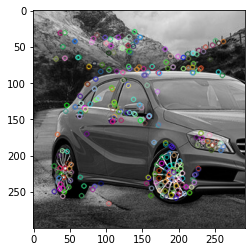

In [32]:
plt.imshow(cv2.drawKeypoints(gray1,kps1,img1))

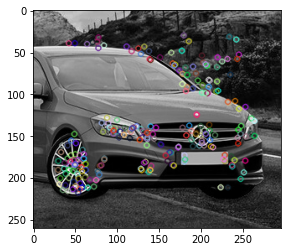

In [33]:
plt.imshow(cv2.drawKeypoints(gray2,kps2,img2))

Total Number of Features matches found are 114


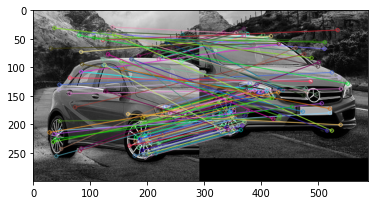

In [34]:
display_output(gray1,kps1,gray2,kps2,descs1,descs2)

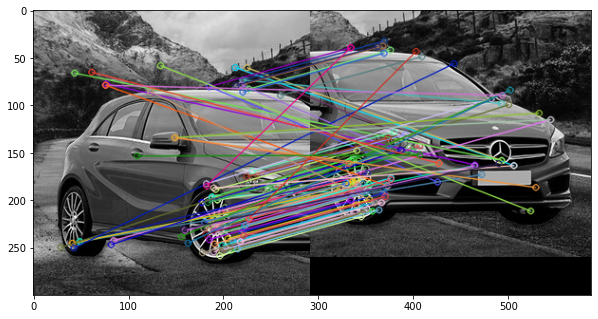

In [35]:
matches_to_draw = custom_match(kps1, descs1, kps2, descs2,gray1,gray2)
draw_custom_match(kps1, kps2, matches_to_draw, gray1, gray2)

In [36]:
img3_name = 'images\\home.jpg'
img4_name = 'images\\home90.jpg'

img3 = cv2.imread(img3_name)
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

img4 = cv2.imread(img4_name)
gray4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

In [37]:
detector = cv2.AKAZE_create()
(kps3, descs3) = detector.detectAndCompute(gray3, None)
(kps4, descs4) = detector.detectAndCompute(gray4, None)

Total Number of Features matches found are 1850


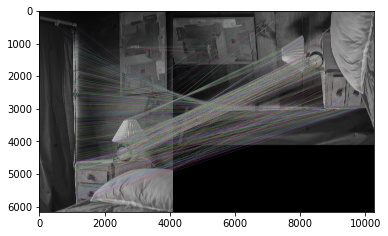

In [38]:
display_output(gray3,kps3,gray4,kps4,descs3,descs4)

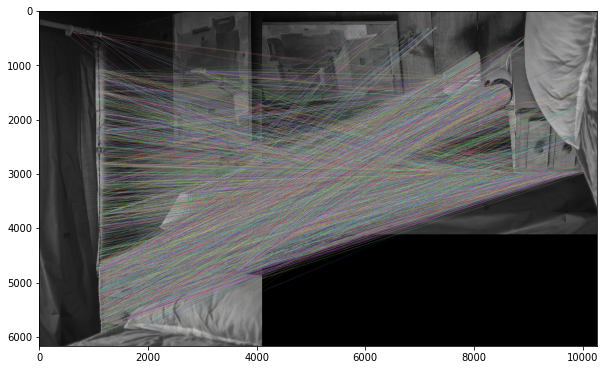

In [39]:
matches_to_draw = custom_match(kps3, descs3, kps4, descs4, gray3, gray4)
draw_custom_match(kps3, kps4, matches_to_draw, gray3, gray4)
